# Regression Discontinuity Design
## Assessing Causal Impact

In [ ]:
#Students that score below 50% on the practice get extra tutoring
#Estimate the impact of that extra education on future test scores
#FinalScore2 has an effect, FinalScore does not

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [86]:
df = pd.read_csv('../data/rdd.csv')
df.head()

,PreTest,FinalScore,FinalScore2
0,56.976870,56.527228,56.527228
1,65.131254,59.295377,59.295377
2,48.578993,56.562681,76.562681
3,57.645485,60.015050,60.015050
4,48.566996,53.360155,73.360155


In [88]:
#Define a cutoff and create a treatment dummy variable
cutoff = 50
df['Treatment'] = np.where(df['PreTest'] < cutoff, 1, 0)
df.head()

,PreTest,FinalScore,FinalScore2,Treatment
0,56.976870,56.527228,56.527228,0
1,65.131254,59.295377,59.295377,0
2,48.578993,56.562681,76.562681,1
3,57.645485,60.015050,60.015050,0
4,48.566996,53.360155,73.360155,1


In [90]:
left_cutoff = df['PreTest'] < cutoff
right_cutoff = df['PreTest'] >= cutoff

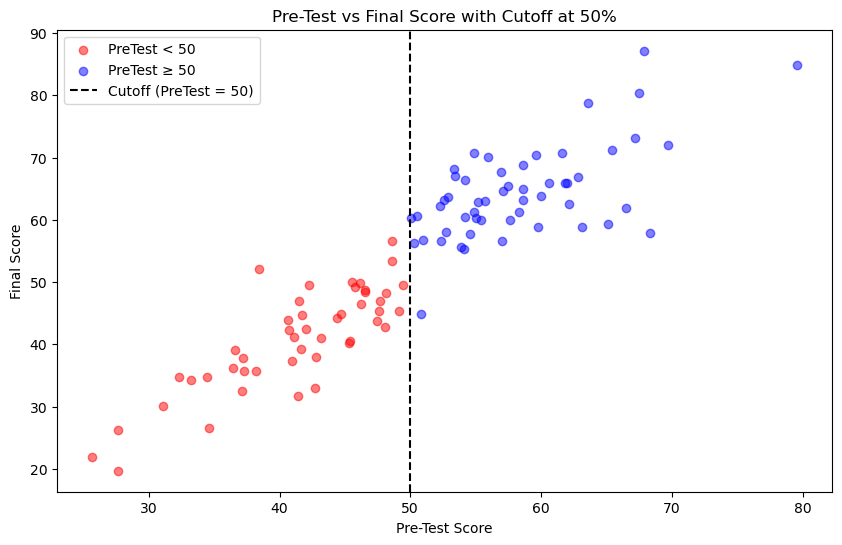

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PreTest'][left_cutoff], df['FinalScore'][left_cutoff], color='red', alpha=0.5, label='PreTest < 50')
plt.scatter(df['PreTest'][right_cutoff], df['FinalScore'][right_cutoff], color='blue', alpha=0.5, label='PreTest ≥ 50')
plt.axvline(x=50, color='black', linestyle='--', label='Cutoff (PreTest = 50)')
plt.xlabel('Pre-Test Score')
plt.ylabel('Final Score')
plt.title('Pre-Test vs Final Score with Cutoff at 50%')
plt.legend()
plt.show()

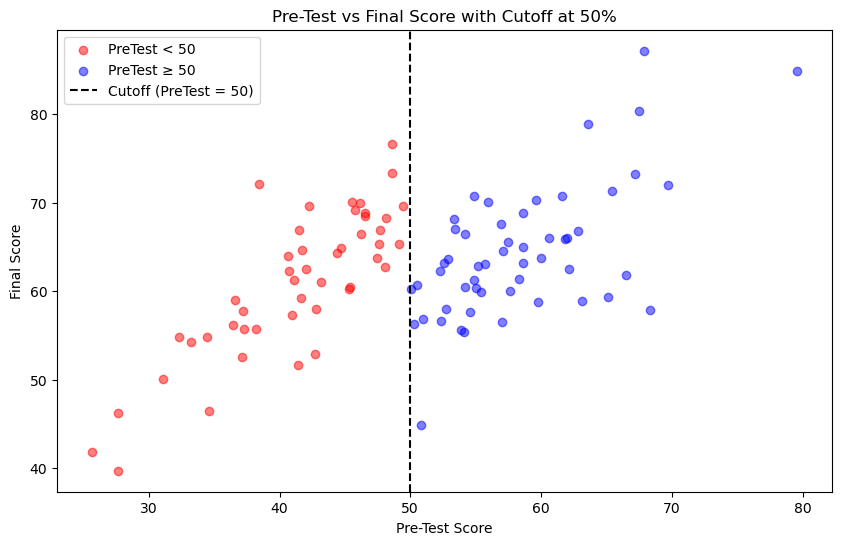

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PreTest'][left_cutoff], df['FinalScore2'][left_cutoff], color='red', alpha=0.5, label='PreTest < 50')
plt.scatter(df['PreTest'][right_cutoff], df['FinalScore2'][right_cutoff], color='blue', alpha=0.5, label='PreTest ≥ 50')
plt.axvline(x=50, color='black', linestyle='--', label='Cutoff (PreTest = 50)')
plt.xlabel('Pre-Test Score')
plt.ylabel('Final Score')
plt.title('Pre-Test vs Final Score with Cutoff at 50%')
plt.legend()
plt.show()

In [74]:
#Center pre-test around the cutoff for ease of interpretation 
df['PreTest_Centered'] = df['PreTest'] - cutoff 
df.head()

,PreTest,FinalScore,FinalScore2,Treatment,PreTest_Centered
0,56.976870,56.527228,56.527228,0,6.976870
1,65.131254,59.295377,59.295377,0,15.131254
2,48.578993,56.562681,76.562681,1,-1.421007
3,57.645485,60.015050,60.015050,0,7.645485
4,48.566996,53.360155,73.360155,1,-1.433004


In [84]:
model = smf.ols('FinalScore ~ Treatment + PreTest_Centered + Treatment:PreTest_Centered', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FinalScore   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.15e-41
Time:                        15:42:38   Log-Likelihood:                -306.46
No. Observations:                 100   AIC:                             620.9
Df Residuals:                      96   BIC:                             631.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     57.6915      1.249     46.191      0.000      55.212      60.171
Treatment                     -7.0669      1.839     -3.843      0.000     -10.717      -3.417
PreTest_Centered               0.7925      0.121      6.549      0.000       0.552       1.033
Treatment:PreTest_Centered     0.3245      0.176      1.847      0.068      -0.024       0.673
==============================================================================
Omnibus:                        2.763   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.650
Skew:                           0.026   Prob(JB):                        0.266
Kurtosis:                       3.796   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

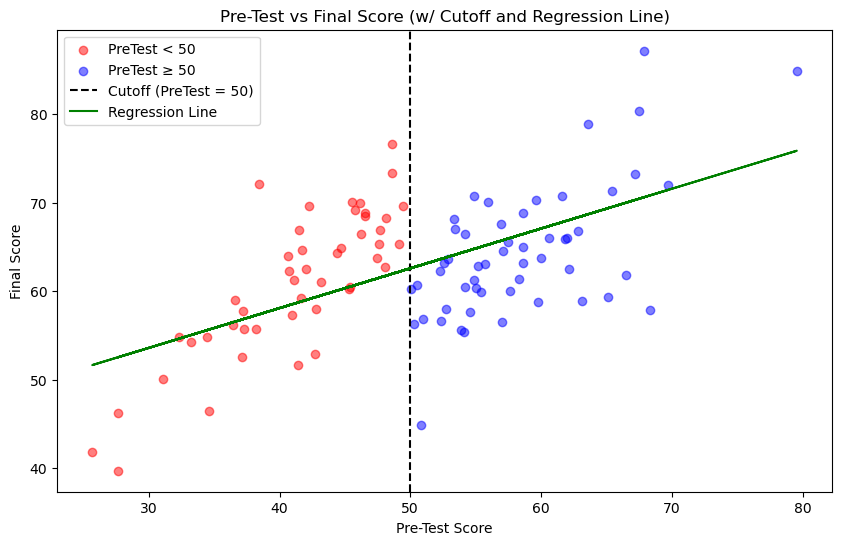

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PreTest'][left_cutoff], df['FinalScore2'][left_cutoff], color='red', alpha=0.5, label='PreTest < 50')
plt.scatter(df['PreTest'][right_cutoff], df['FinalScore2'][right_cutoff], color='blue', alpha=0.5, label='PreTest ≥ 50')
plt.axvline(x=50, color='black', linestyle='--', label='Cutoff (PreTest = 50)')
X = sm.add_constant(df['PreTest'])  
model = sm.OLS(df['FinalScore2'], X).fit()
df['Predicted'] = model.predict(X)
plt.plot(df['PreTest'], df['Predicted'], color='green', label='Regression Line')
plt.xlabel('Pre-Test Score')
plt.ylabel('Final Score')
plt.title('Pre-Test vs Final Score (w/ Cutoff and Regression Line)')
plt.legend()
plt.show()

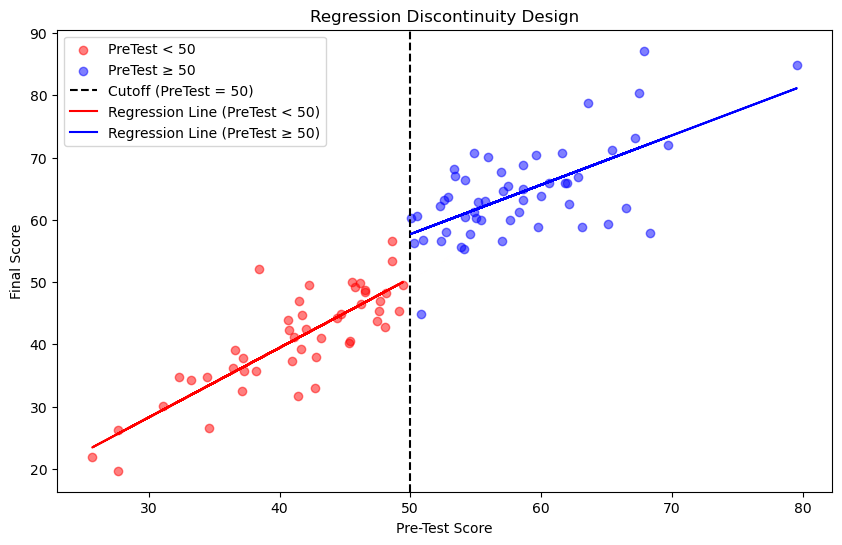

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PreTest'][left_cutoff], df['FinalScore'][left_cutoff], color='red', alpha=0.5, label='PreTest < 50')
plt.scatter(df['PreTest'][right_cutoff], df['FinalScore'][right_cutoff], color='blue', alpha=0.5, label='PreTest ≥ 50')
plt.axvline(x=50, color='black', linestyle='--', label='Cutoff (PreTest = 50)')

#Fit separate regression models for each side of the cutoff
X_left = sm.add_constant(df['PreTest'][left_cutoff])
model_left = sm.OLS(df['FinalScore'][left_cutoff], X_left).fit()
X_right = sm.add_constant(df['PreTest'][right_cutoff])
model_right = sm.OLS(df['FinalScore'][right_cutoff], X_right).fit()

pred_left = model_left.predict(X_left)
pred_right = model_right.predict(X_right)

plt.plot(df['PreTest'][left_cutoff], pred_left, color='red', label='Regression Line (PreTest < 50)')
plt.plot(df['PreTest'][right_cutoff], pred_right, color='blue', label='Regression Line (PreTest ≥ 50)')
plt.xlabel('Pre-Test Score')
plt.ylabel('Final Score')
plt.title('Regression Discontinuity Design')
plt.legend()
plt.show()

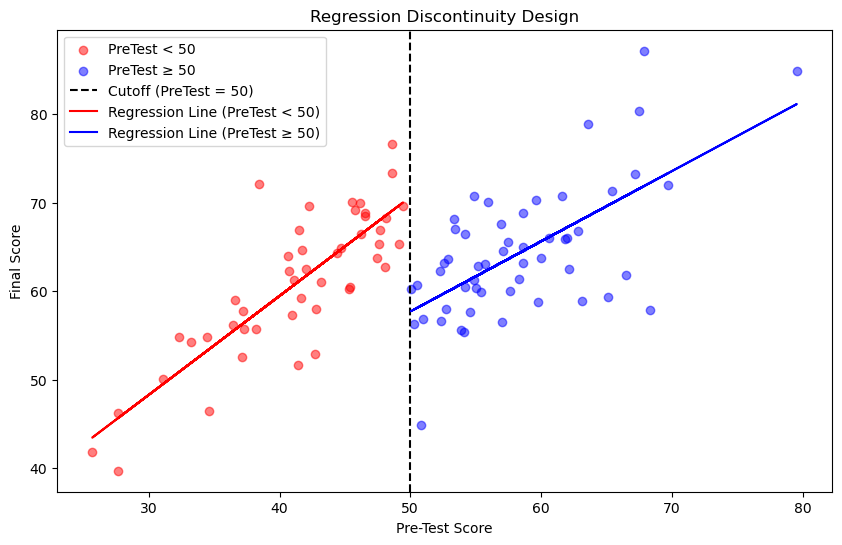

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PreTest'][left_cutoff], df['FinalScore2'][left_cutoff], color='red', alpha=0.5, label='PreTest < 50')
plt.scatter(df['PreTest'][right_cutoff], df['FinalScore2'][right_cutoff], color='blue', alpha=0.5, label='PreTest ≥ 50')
plt.axvline(x=50, color='black', linestyle='--', label='Cutoff (PreTest = 50)')

#Fit separate regression models for each side of the cutoff
X_left = sm.add_constant(df['PreTest'][left_cutoff])
model_left = sm.OLS(df['FinalScore2'][left_cutoff], X_left).fit()
X_right = sm.add_constant(df['PreTest'][right_cutoff])
model_right = sm.OLS(df['FinalScore2'][right_cutoff], X_right).fit()

pred_left = model_left.predict(X_left)
pred_right = model_right.predict(X_right)

plt.plot(df['PreTest'][left_cutoff], pred_left, color='red', label='Regression Line (PreTest < 50)')
plt.plot(df['PreTest'][right_cutoff], pred_right, color='blue', label='Regression Line (PreTest ≥ 50)')
plt.xlabel('Pre-Test Score')
plt.ylabel('Final Score')
plt.title('Regression Discontinuity Design')
plt.legend()
plt.show()

In [42]:
#Create polynomial (quadratic) terms for PreTest
df['PreTestSq'] = df['PreTest_Centered'] ** 2
model = smf.ols('FinalScore2 ~ Treatment + PreTest_Centered + PreTestSq + Treatment:PreTest_Centered', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FinalScore2   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     32.20
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           5.97e-17
Time:                        15:32:28   Log-Likelihood:                -306.45
No. Observations:                 100   AIC:                             622.9
Df Residuals:                      95   BIC:                             635.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     70.6753      1.627     43.445      0.000      67.446      73.905
Treatment                    -12.9302      1.849     -6.992      0.000     -16.601      -9.259
PreTest_Centered               1.1309      0.278      4.069      0.000       0.579       1.683
PreTestSq                      0.0006      0.011      0.056      0.955      -0.021       0.023
Treatment:PreTest_Centered    -0.3528      0.531     -0.665      0.508      -1.407       0.701
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.702
Skew:                           0.028   Prob(JB):                        0.259
Kurtosis:                       3.803   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

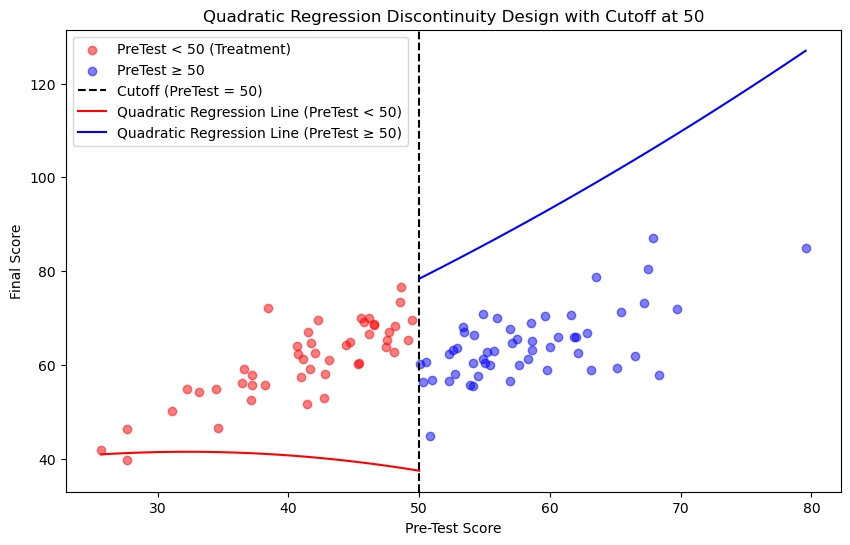

In [46]:
cutoff=50

plt.figure(figsize=(10, 6))
plt.scatter(df['PreTest'][left_cutoff], df['FinalScore2'][left_cutoff], color='red', alpha=0.5, label='PreTest < 50 (Treatment)')
plt.scatter(df['PreTest'][right_cutoff], df['FinalScore2'][right_cutoff], color='blue', alpha=0.5, label='PreTest ≥ 50')
plt.axvline(x=cutoff, color='black', linestyle='--', label='Cutoff (PreTest = 50)')


X_left = sm.add_constant(df[['PreTest', 'PreTestSq']][left_cutoff])
model_left = sm.OLS(df['FinalScore2'][left_cutoff], X_left).fit()

X_right = sm.add_constant(df[['PreTest', 'PreTestSq']][right_cutoff])
model_right = sm.OLS(df['FinalScore2'][right_cutoff], X_right).fit()

pretest_range_left = np.linspace(df['PreTest'].min(), cutoff, 100)
pretest_range_right = np.linspace(cutoff, df['PreTest'].max(), 100)

pretest_range_left_quad = pretest_range_left ** 2
pretest_range_right_quad = pretest_range_right ** 2
X_range_left = sm.add_constant(np.column_stack([pretest_range_left, pretest_range_left_quad]))
X_range_right = sm.add_constant(np.column_stack([pretest_range_right, pretest_range_right_quad]))
pred_left = model_left.predict(X_range_left)
pred_right = model_right.predict(X_range_right)
plt.plot(pretest_range_left, pred_left, color='red', label='Quadratic Regression Line (PreTest < 50)')
plt.plot(pretest_range_right, pred_right, color='blue', label='Quadratic Regression Line (PreTest ≥ 50)')
plt.xlabel('Pre-Test Score')
plt.ylabel('Final Score')
plt.title('Quadratic Regression Discontinuity Design with Cutoff at 50')
plt.legend()
plt.show()
